### Basic analysis

This file gives you the mCherry and GFP readouts for each dynamic video.
First, we segment each one, then, we get the mCherry/GFP fil

In [3]:
### Run parameters -- change these for every experiment
channel_map = {'pc': 0, 'mCherry': 1, 'GFP': 2}

ara_wv = ["0.0", "0.02", "0.04", "0.08", "0.16"] + ["wt"]
mini_cells = ["No", "No", "No", "No", "No", "wt"]
ignore = ["Yes", "No", "No", "No", "No", "No"]
strain = "SJ1883"
ctc_nguL = ["450"] * (len(ara_wv) - 1) + ["wt"]
media = "MOPS Rich Glycerol"
frame = 0
out_folders = [ara + "ara/" for ara in ara_wv[:-1]] + ["wt/"]
fovs = [
    (1,6),
    (9,14),
    (16,22),
    (25,29),
    (32,41),
    (44,51),

]
fovs_path = "20220308_SJ1883.nd2"
# length sanity check.
print(len(fovs) == len(ara_wv) == len(out_folders) == len(ctc_nguL))
pixel_size = 0.11


True


In [4]:

import matplotlib.pyplot as plt
import tifffile as tiff
import numpy as np
from cellpose_omni import models, core, utils
from skimage.measure import label
import os

# this lets me ignore them.
import warnings
warnings.filterwarnings('ignore')
def cmkdir(path):
    if os.path.exists(path):
        return
    os.mkdir(path)

def import_frame(nd2_path, channel = 0, frame = 0, fov = 1):
    # I've had huge amounts of trouble with various nd2 readers.
    # in view of this, I'm quarantining this function so I can swap it out more easily.
    import nd2
    # load ND2 images /change this per experiment
    # produces a warning, but you can ignore it.
    frames = nd2.imread(nd2_path, dask=True)
    #frames.bundle_axes = 'tcyx'
    #frames.iter_axes = 'm'
    frame = np.asarray(frames[frame, fov, channel])
    return frame
    
chans = [0,0] #this means segment based on first channel, no second channel
model = models.CellposeModel(gpu=True, model_type='bact_phase_omni')
# define parameters
mask_threshold = 0
verbose = 0 # turn on if you want to see more output
use_gpu = True #defined above
transparency = True # transparency in flow output
rescale=None # give this a number if you need to upscale or downscale your images
omni = True # we can turn off Omnipose mask reconstruction, not advised
flow_threshold = .07 # default is .4, but only needed if there are spurious masks to clean up; slows down output
resample = True #whether or not to run dynamics on rescaled grid or original grid
cluster=True # use DBSCAN clustering

def segment(imgs):
    masks, flows, styles = model.eval(imgs,
                                      channels=chans,
                                      rescale=rescale,
                                      mask_threshold=mask_threshold,
                                      transparency=transparency,
                                      flow_threshold=flow_threshold,
                                      omni=omni,
                                      cluster=cluster,
                                      resample=resample,
                                      verbose=verbose,
                                      diameter=20
                            )
    return masks





2024-10-30 17:02:26,207	[INFO]     omnipose/gpu.py               <module>....()	 line 9	On ARM, OMP_NUM_THREADS set to 1


2024-10-30 17:02:28,679	[INFO]     cellpose_omni/models.py       __init__....()	 line 432	>>bact_phase_omni<< model set to be used
2024-10-30 17:02:28,686	[INFO]     omnipose/gpu.py               _use...torch()	 line 49	** TORCH GPU version installed and working. **
2024-10-30 17:02:28,686	[INFO]     cellpose_omni/core.py         assi...evice()	 line 72	>>>> using GPU
2024-10-30 17:02:28,781	[INFO]                                   __init__....()	 line 170	u-net config: ([2, 32, 64, 128, 256], 4, 2)


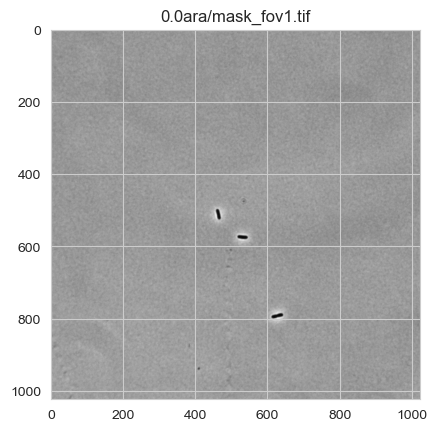

2024-10-25 07:26:25,675	[INFO]     omnipose/utils.py             make...es_ND()	 line 258	Running on tiles. Now normalizing each tile separately.


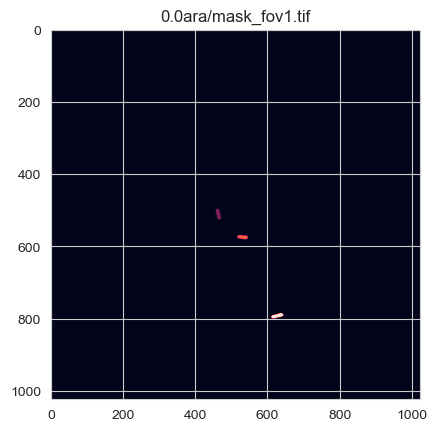

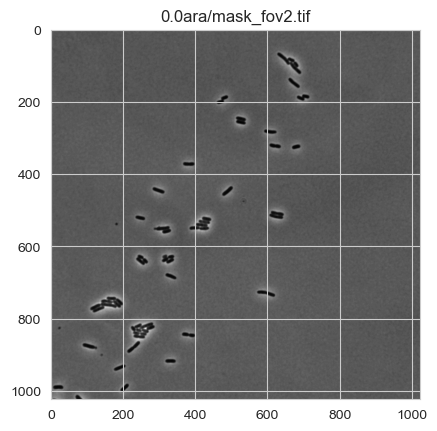

2024-10-25 07:26:29,016	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


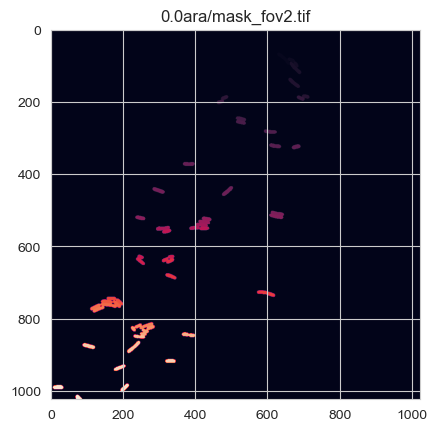

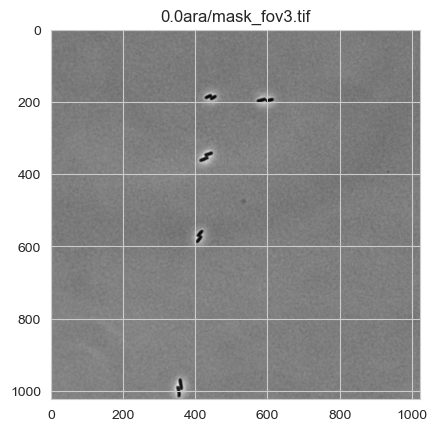

2024-10-25 07:26:31,939	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


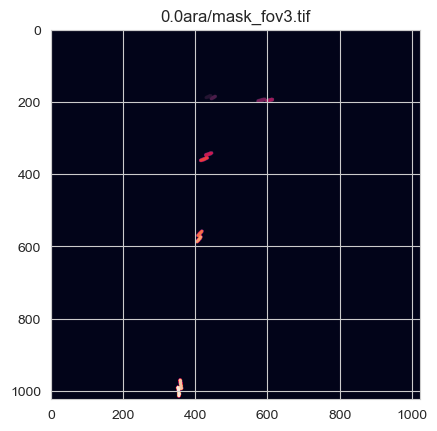

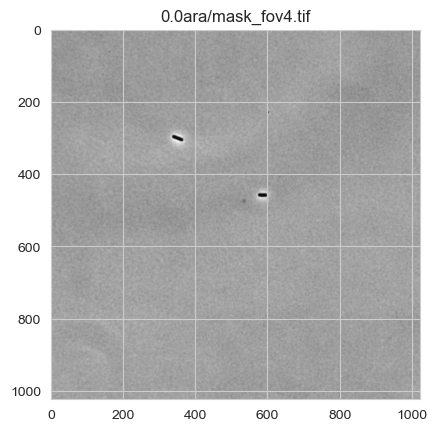

2024-10-25 07:26:34,756	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


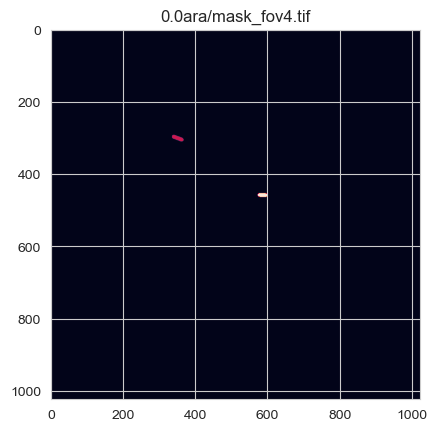

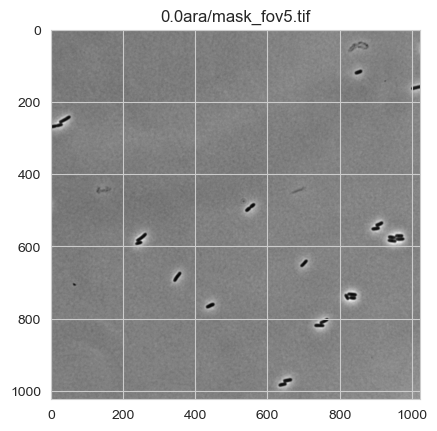

2024-10-25 07:26:37,630	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


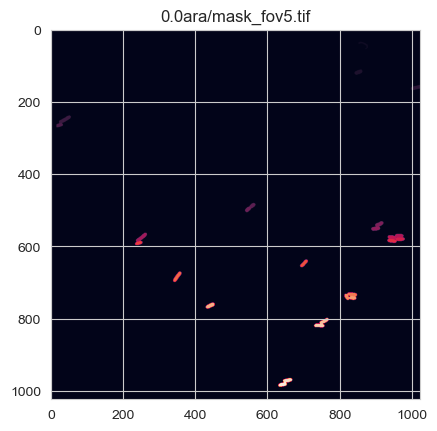

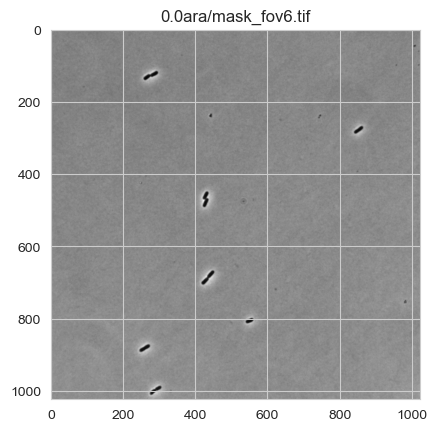

2024-10-25 07:26:40,537	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


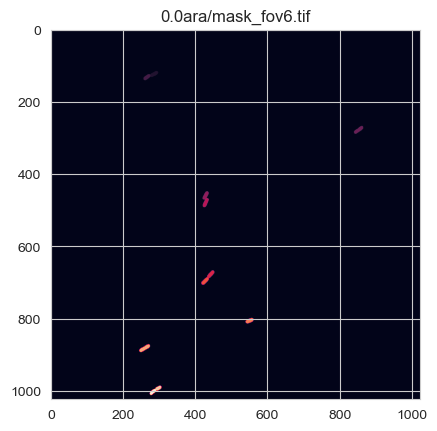

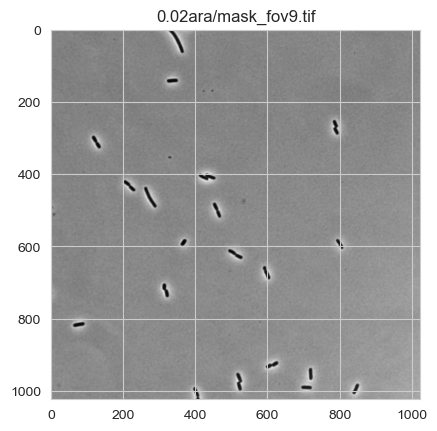

2024-10-25 07:26:43,432	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


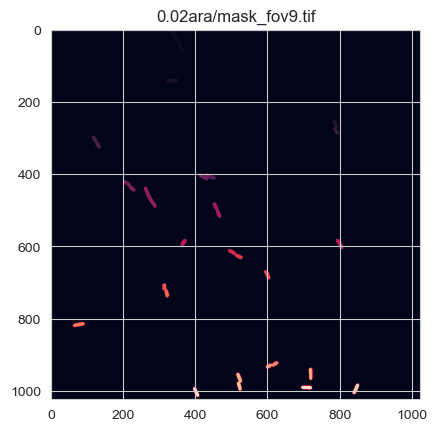

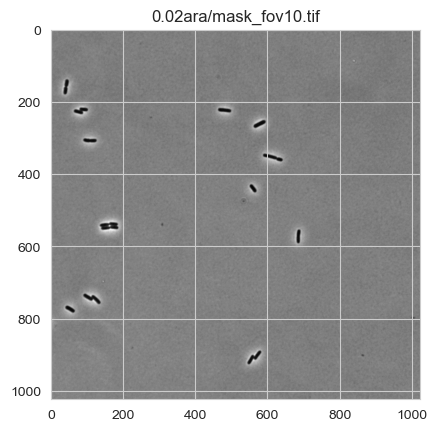

2024-10-25 07:26:46,392	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


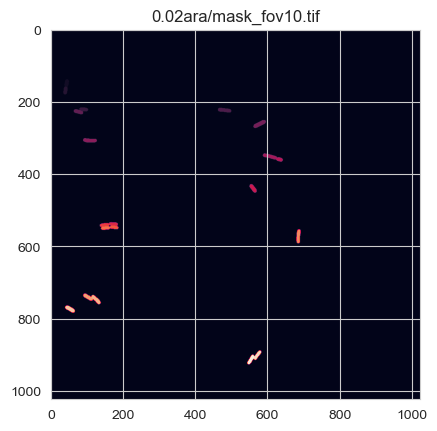

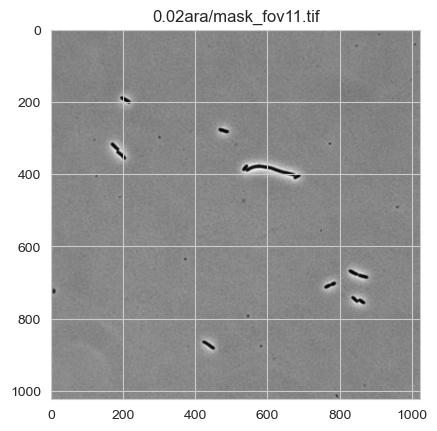

2024-10-25 07:26:49,314	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


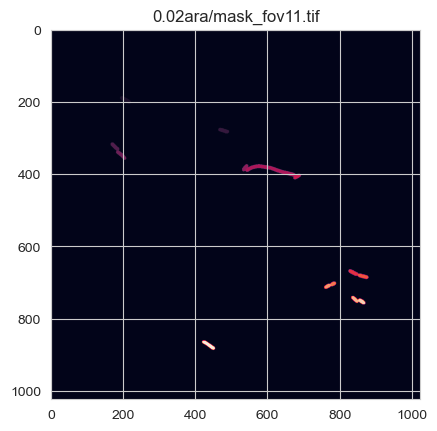

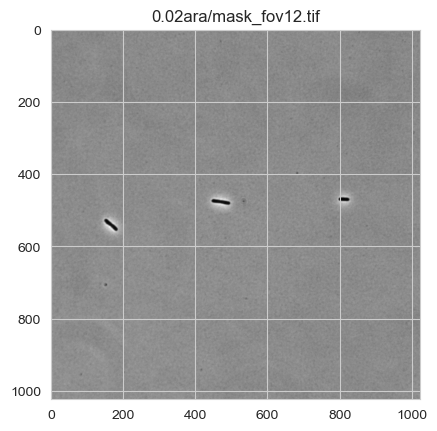

2024-10-25 07:26:52,248	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


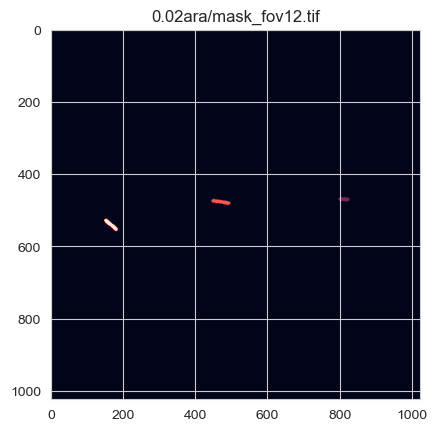

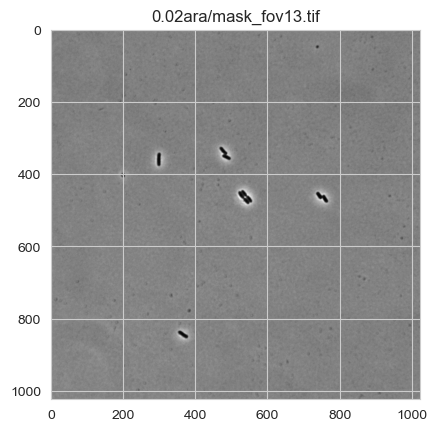

2024-10-25 07:26:55,231	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


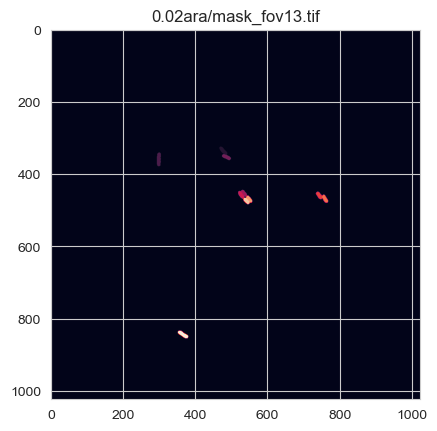

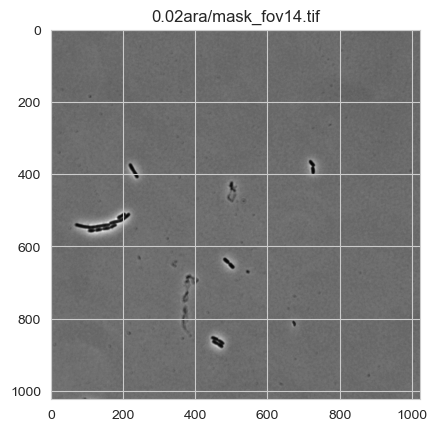

2024-10-25 07:26:58,214	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


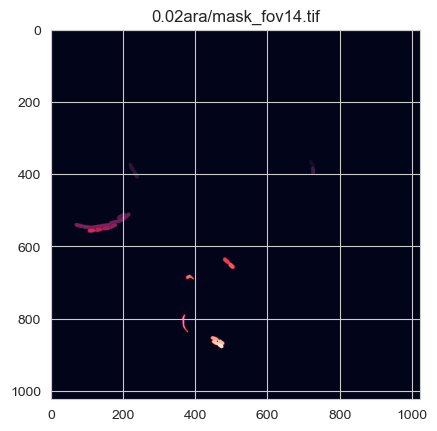

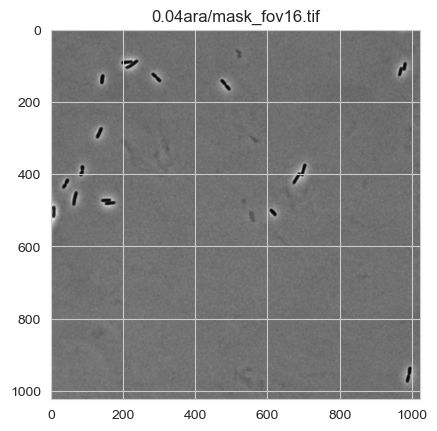

2024-10-25 07:27:01,221	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


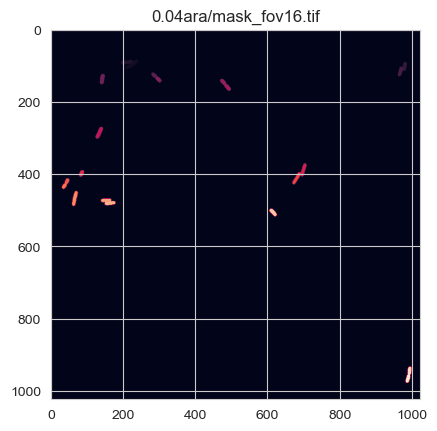

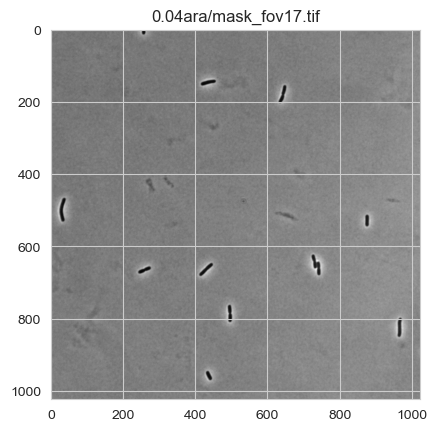

2024-10-25 07:27:04,282	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


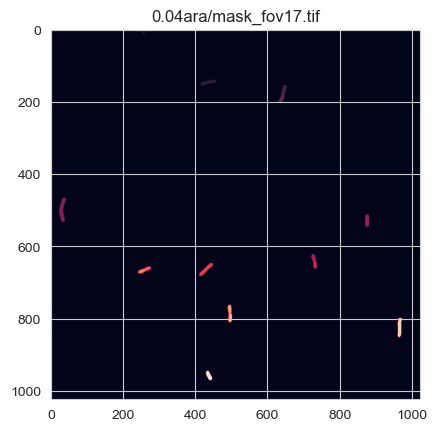

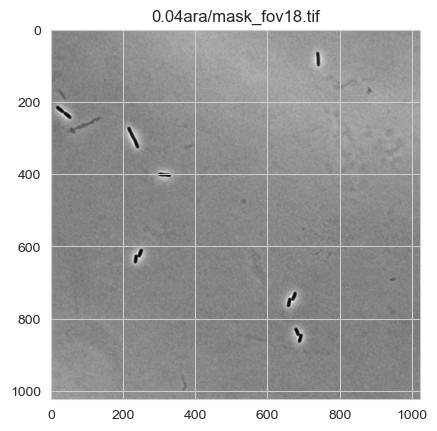

2024-10-25 07:27:07,277	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


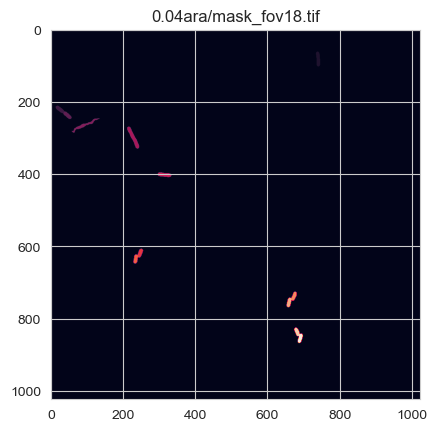

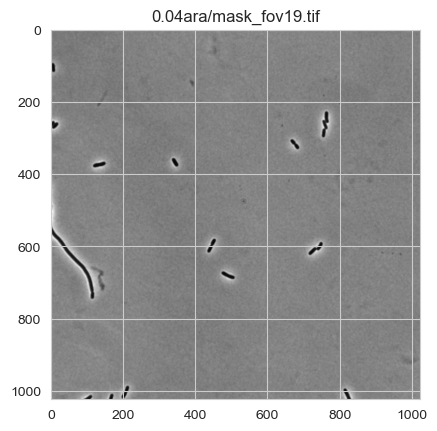

2024-10-25 07:27:10,239	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


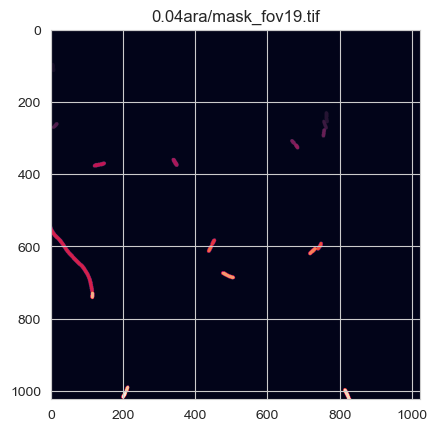

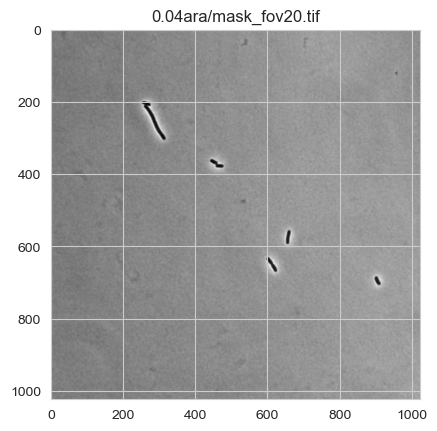

2024-10-25 07:27:13,265	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


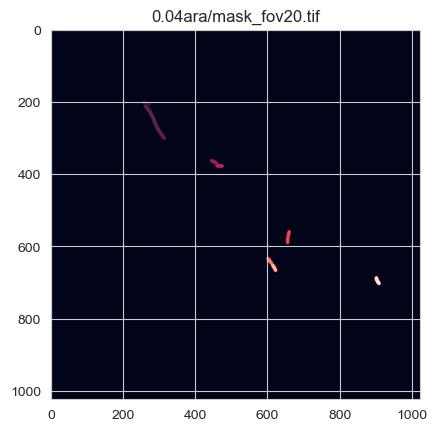

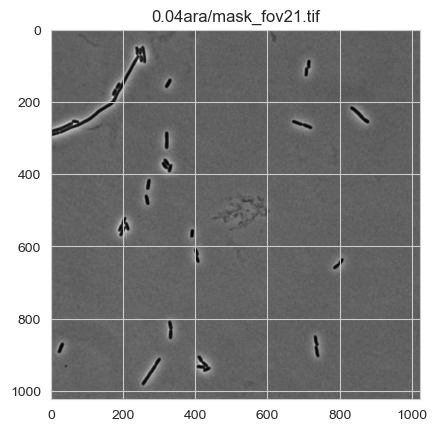

2024-10-25 07:27:16,317	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


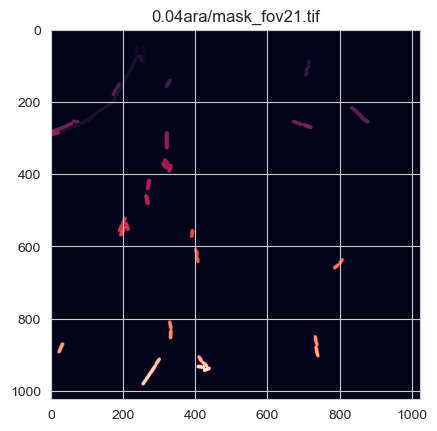

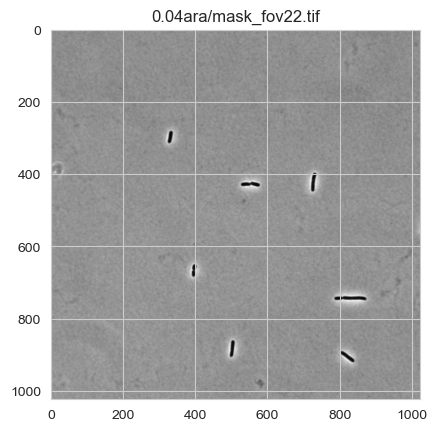

2024-10-25 07:27:19,416	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


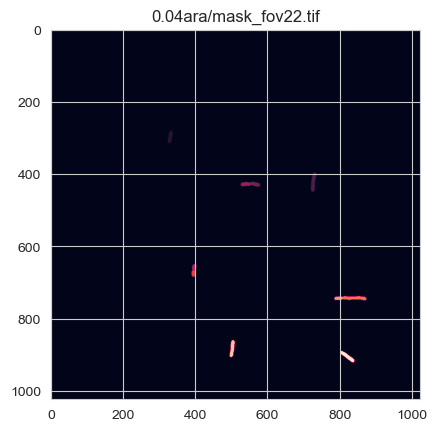

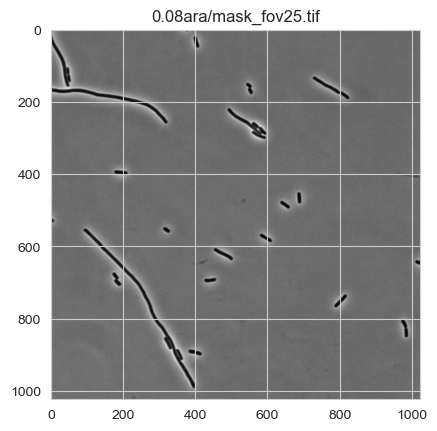

2024-10-25 07:27:22,412	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


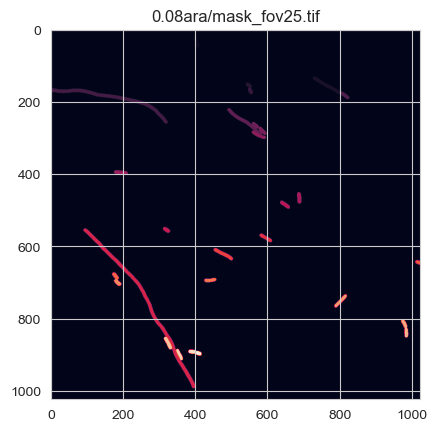

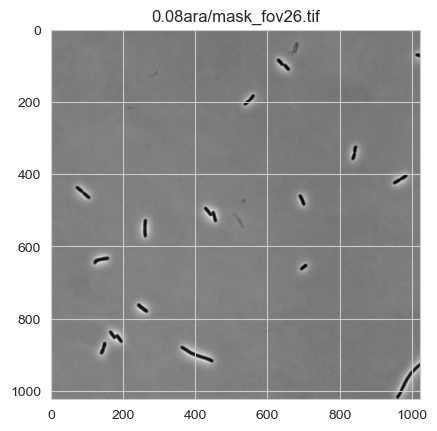

2024-10-25 07:27:25,515	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


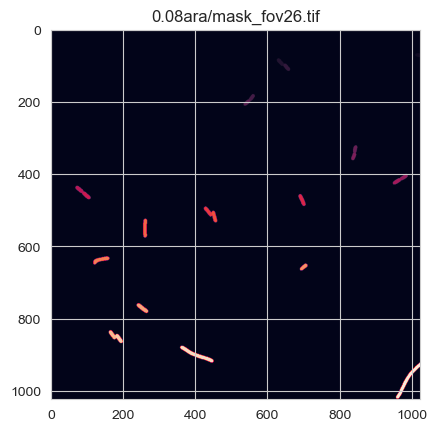

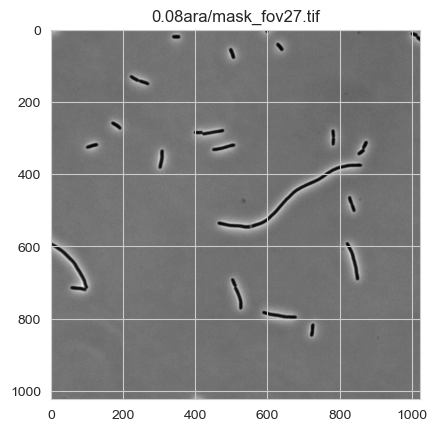

2024-10-25 07:27:28,524	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


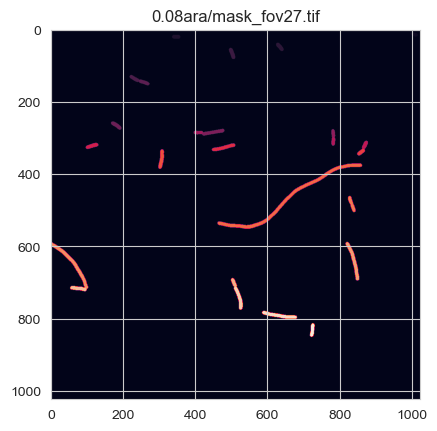

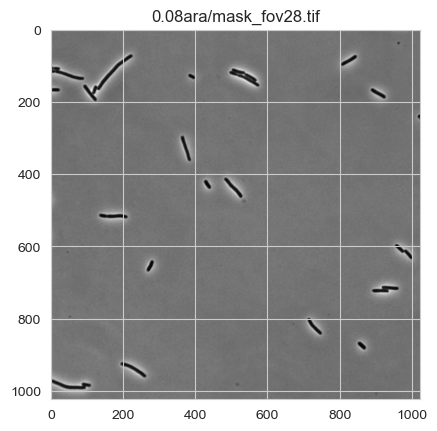

2024-10-25 07:27:31,603	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


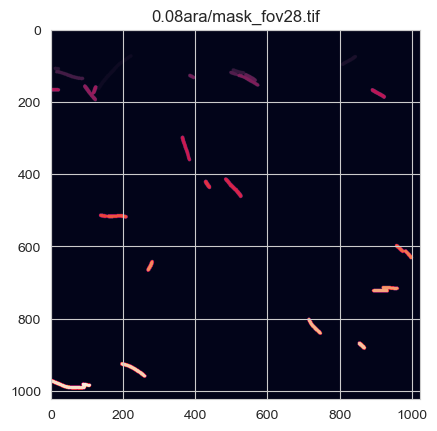

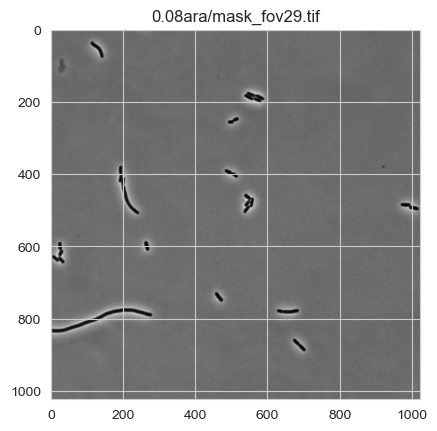

2024-10-25 07:27:34,683	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


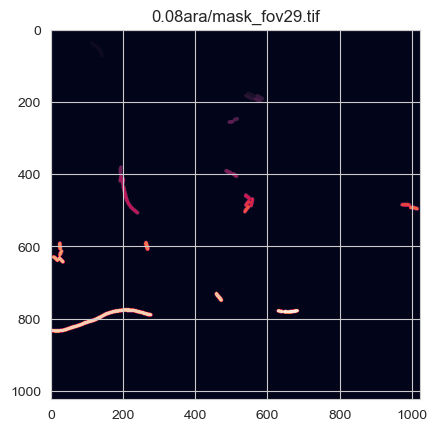

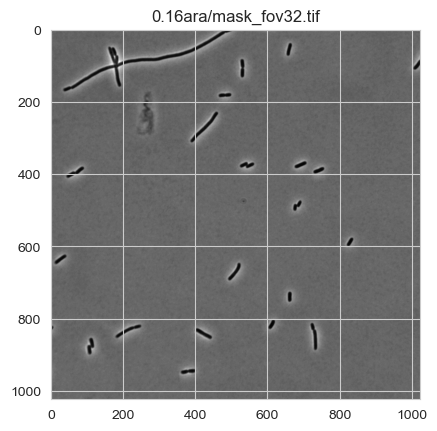

2024-10-25 07:27:37,818	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


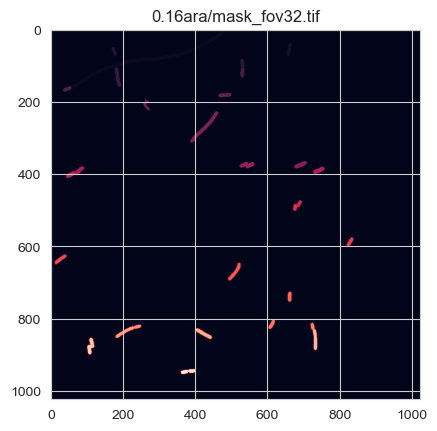

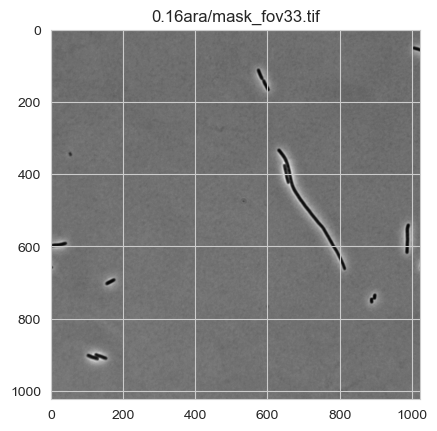

2024-10-25 07:27:41,008	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


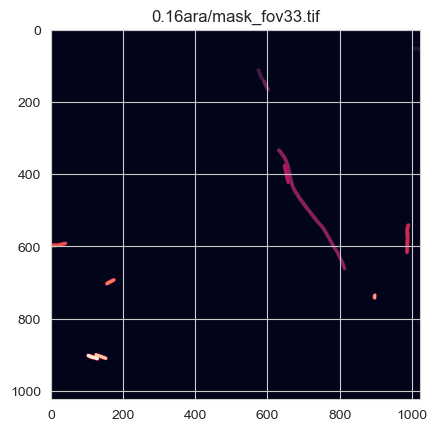

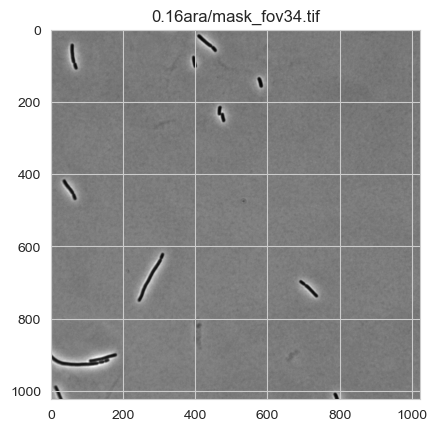

2024-10-25 07:27:44,109	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


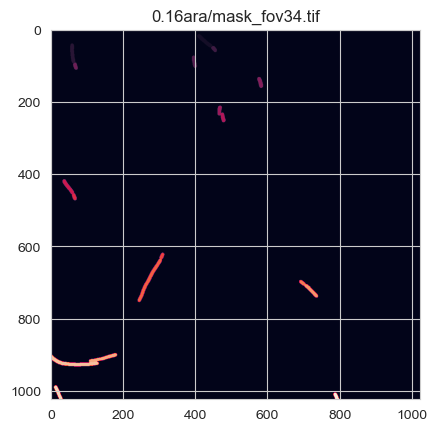

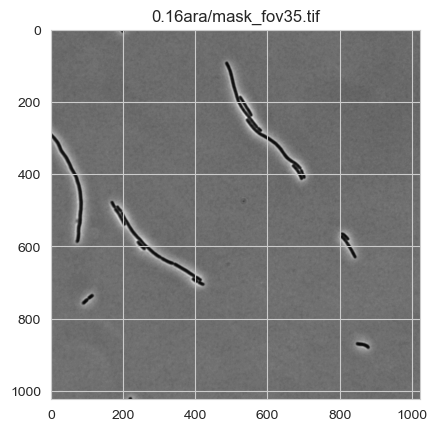

2024-10-25 07:27:47,285	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


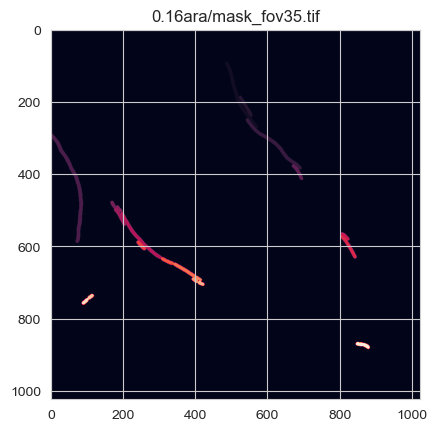

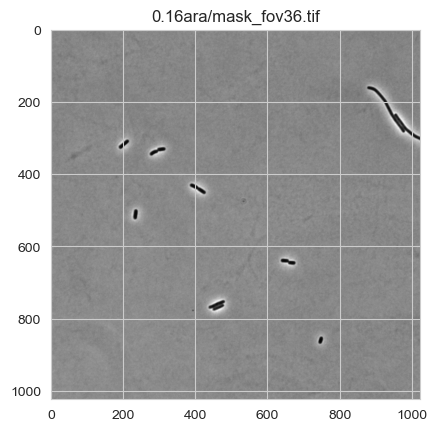

2024-10-25 07:27:50,540	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


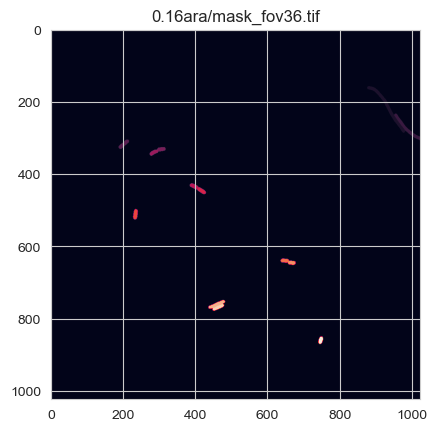

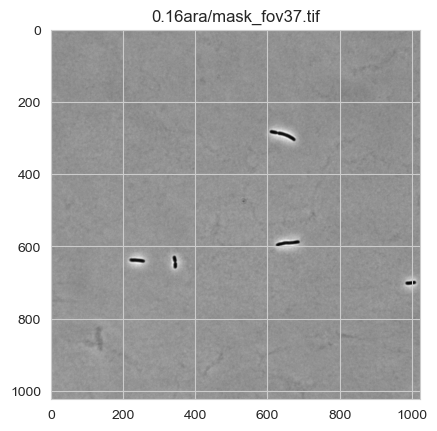

2024-10-25 07:27:53,716	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


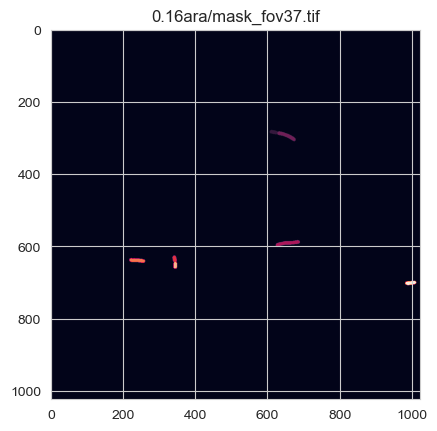

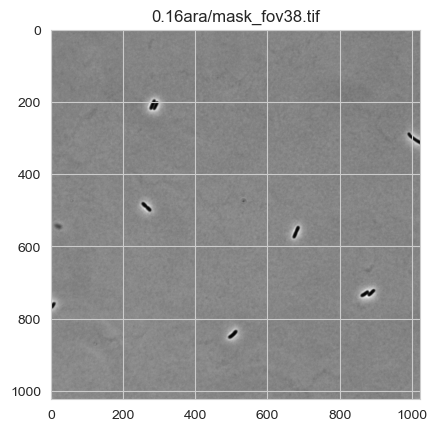

2024-10-25 07:27:56,708	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


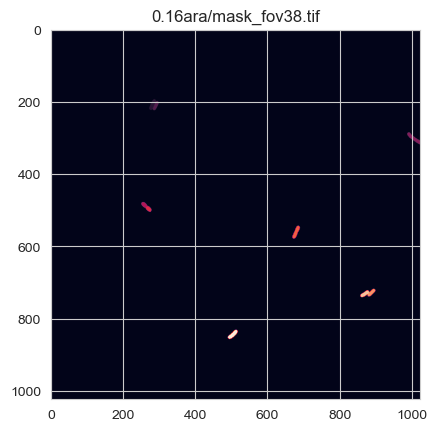

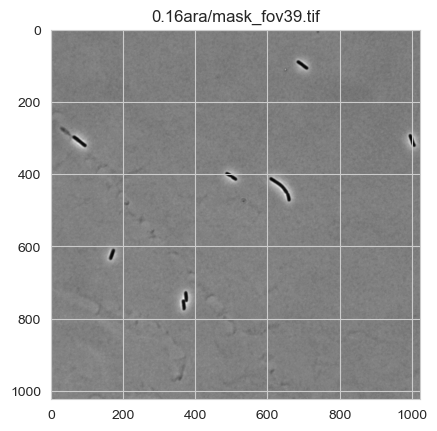

2024-10-25 07:27:59,857	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


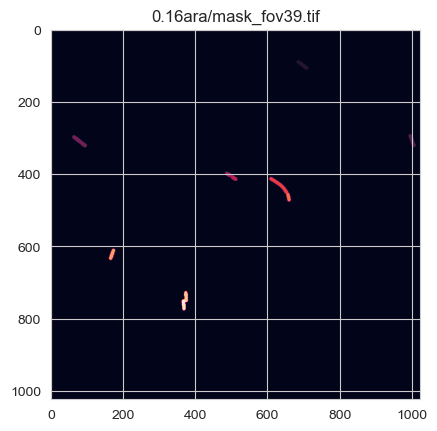

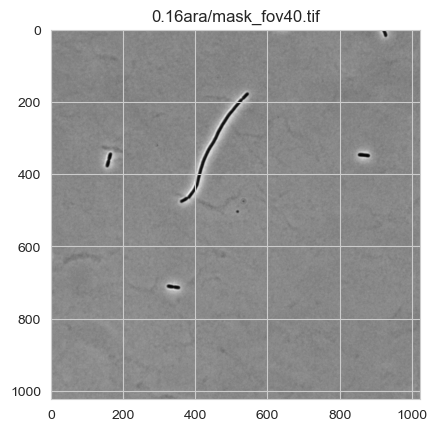

2024-10-25 07:28:02,939	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


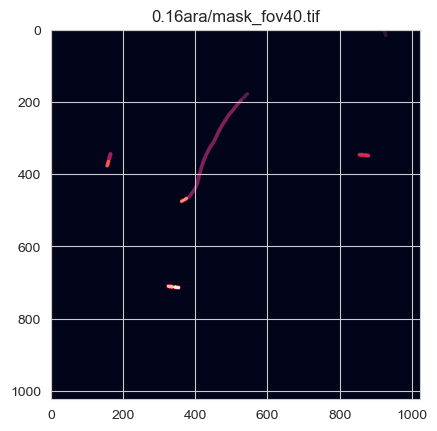

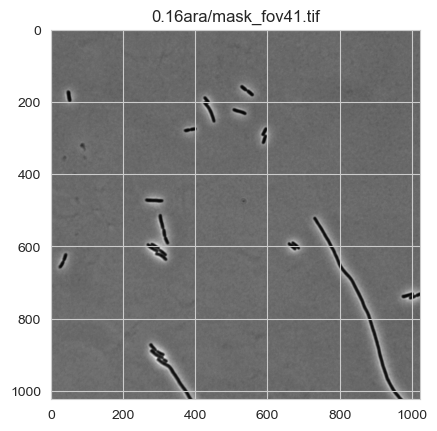

2024-10-25 07:28:05,997	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


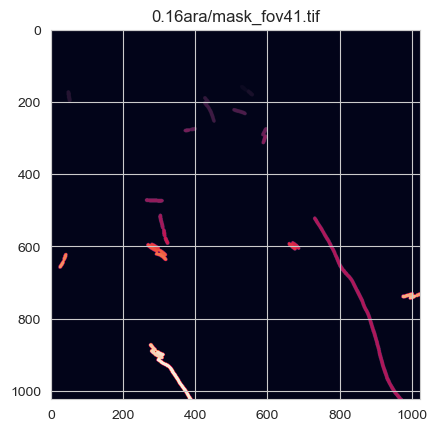

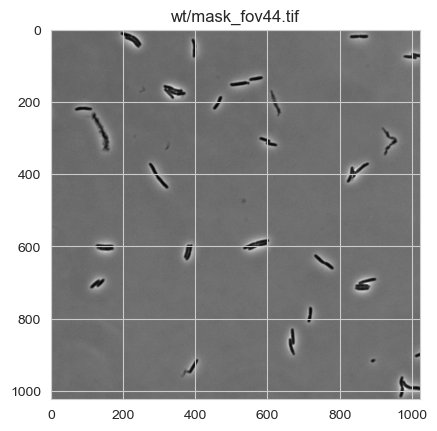

2024-10-25 07:28:09,248	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


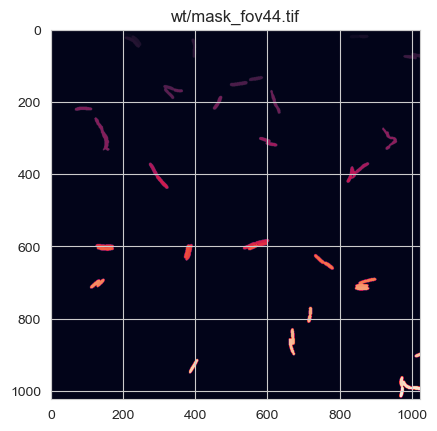

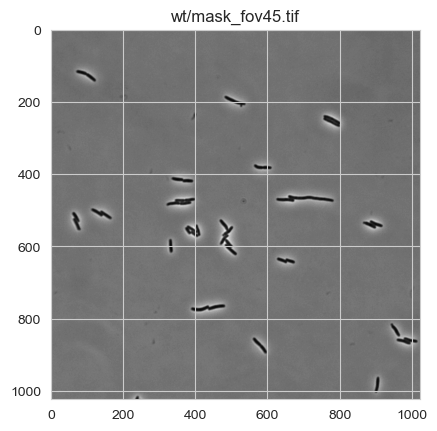

2024-10-25 07:28:12,451	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


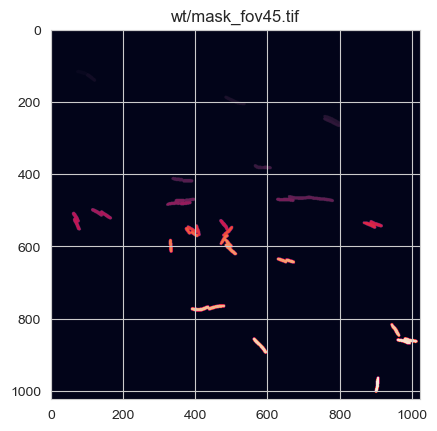

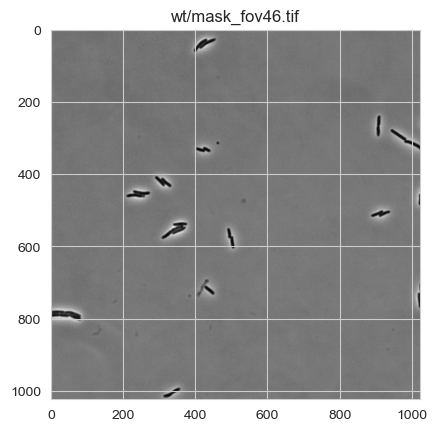

2024-10-25 07:28:15,662	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


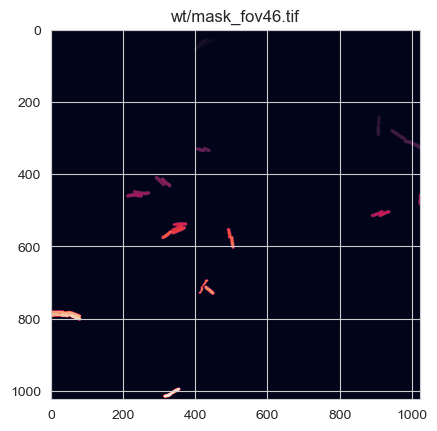

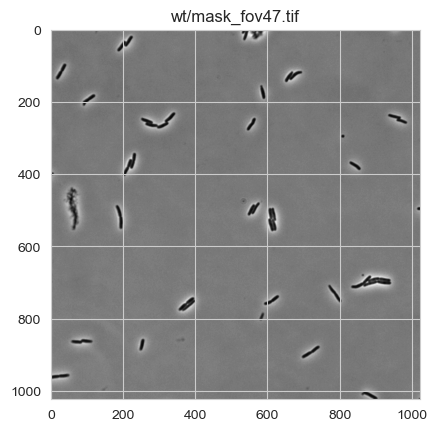

2024-10-25 07:28:18,789	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


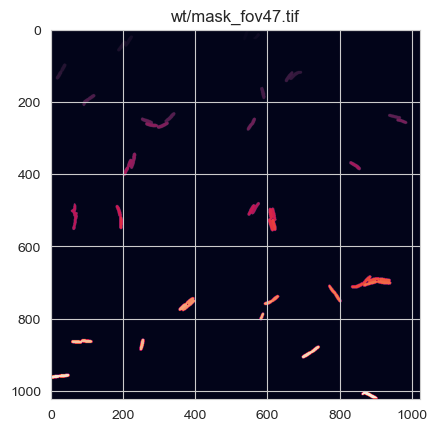

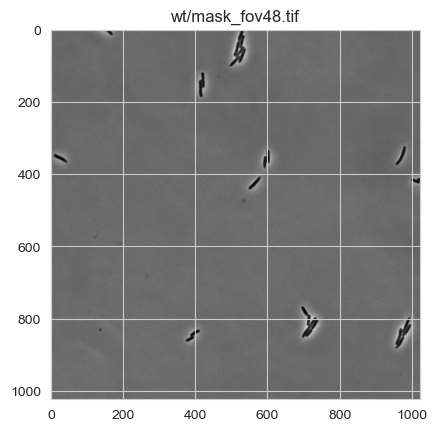

2024-10-25 07:28:21,914	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


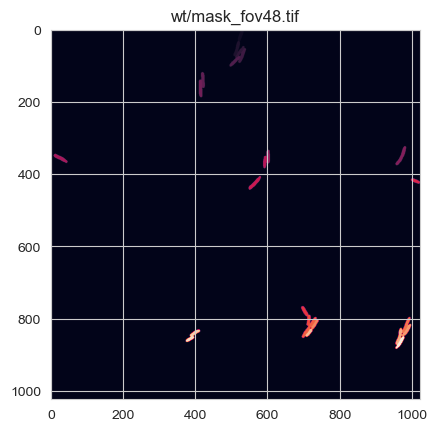

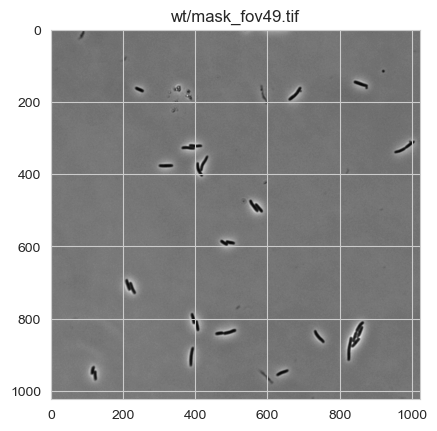

2024-10-25 07:28:24,979	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


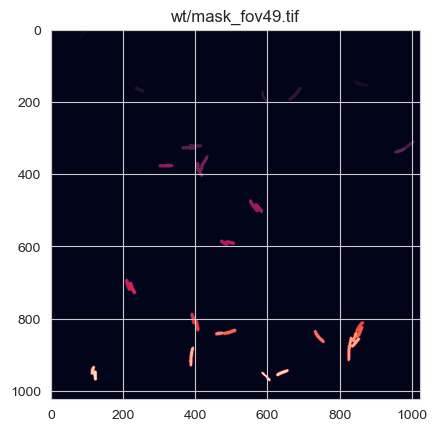

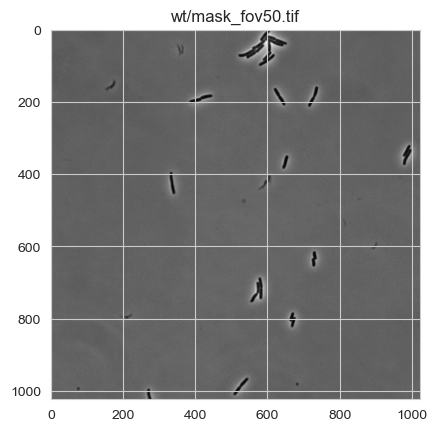

2024-10-25 07:28:28,025	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


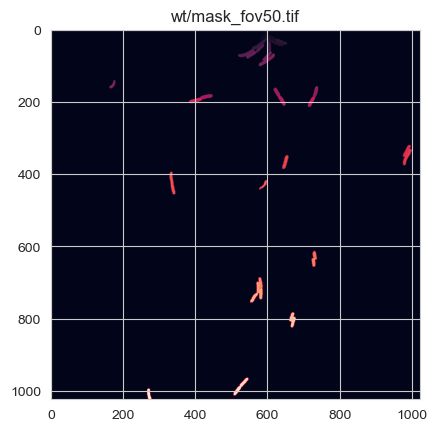

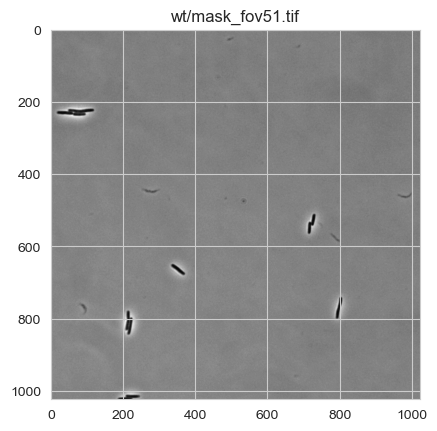

2024-10-25 07:28:31,106	[INFO]                                               	 line 258	Running on tiles. Now normalizing each tile separately.


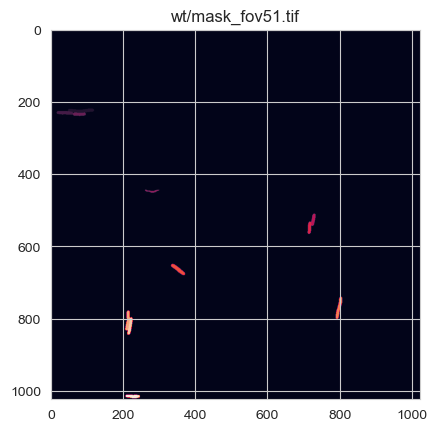

In [5]:
### Generate masks.

mask_filenames = []
fov_list = []
for out_folder, cur_fovs in zip(out_folders, fovs):
    for fov in range(cur_fovs[0], cur_fovs[1] + 1):
        fname = out_folder + f"mask_fov{fov}.tif"
        mask_filenames.append(fname)
        fov_list.append(fov)

from pathlib import Path
for mask_filename, fov in zip(mask_filenames, fov_list):
    img = import_frame(fovs_path, 
                       channel=0, 
                       frame=frame, 
                       fov=fov - 1)
    plt.title(mask_filename)

    plt.imshow(img, cmap='gray')
    plt.show()
    mask = segment([img])[0].astype(np.int64)
    # add a filter for mask size -- only want sufficiently large cells!
    for idx in range(1, np.max(mask) + 1):
        if np.sum(mask == idx) < 150: # arbitrary cutoff for short cells.
            mask[mask == idx] = 0
    
    # and now make labels consecutive
    mask = label(mask).astype(np.uint32)
    if np.max(mask) == 0:
        #print(f"skipping {filename} due to a lack of identified good cells")
        continue
    plt.imshow(mask)
    plt.title(mask_filename)
    plt.show()
    cmkdir(mask_filename.split("/")[0])
    tiff.imwrite(mask_filename, mask)

In [5]:
def calculate_cell_volumes(masks, crop = 100):
    cropped_mask = masks[crop:-crop,crop:-crop] 

    diam = utils.diameters(masks, omni=True)[0]
    radius = (diam**0.75) /2
    volumes = []
    for mask_idx in range(1, np.max(masks)):
        cur_mask = cropped_mask == mask_idx

        mask_length = np.sum(cur_mask) / (radius * 2)
        volumes.append(mask_length)
    return volumes

def calculate_cell_radii(masks):
    return (utils.diameters(masks, omni=True)[0]**0.75) / 2

In [6]:
def calculate_fls(masks, fl_img, cell_volumes=None, crop = 100):
    '''Calculates the fluorescence concentration given some cell masks and a fluorescence image.
    masks: nxn img, 0 => background, >0 => cell.
    fl_img: nxn img
    crop: integer < n. How much to crop borders by to correct for heterogenous illumination.
    '''
    if not cell_volumes:
        cell_volumes = calculate_cell_volumes(masks, crop=crop)
        
     ## Crop to correct for heterogenous illumination.
    cropped_mask = masks[crop:-crop,crop:-crop] 
    cropped_img = fl_img[crop:-crop,crop:-crop]

    # subtract off background
    background_mask = cropped_mask == 0
    background_fl = np.mean(cropped_img[background_mask])
    cropped_img = cropped_img - background_fl
    
    cell_fls = []
    for mask_idx, cell_volume in enumerate(cell_volumes):
        cur_mask = cropped_mask == (mask_idx + 1)

        cur_fl = np.sum(cur_mask * cropped_img) / cell_volume
        if math.isnan(cur_fl) or (np.sum(cur_mask) < 150):
            print("skipping", end='\r')
            continue
        cell_fls.append(cur_fl)
    return cell_fls

In [7]:
import math
import tifffile as tiff
gfps = []
mchrys = []
gfp_stds = []
mchry_stds = []
radii = []
lengths = []
total_cells = []
frames = 10 # this is currently ignored.
crop = 100

for out_folder, cur_fovs in zip(out_folders, fovs):
    per_cell_gfp = []
    per_cell_mCherry = []
    mask_radii = []
    per_cell_volumes = []
    for fov in range(cur_fovs[0], 1+cur_fovs[1]):
        mask_filename = out_folder + f"mask_fov{fov}.tif"
        mask = tiff.imread(mask_filename)
        
        # I am not fully convinced by Aaron's normalization procedure.
        # to be honest, I think it only makes sense to do this at a 
        # cell-by-cell, rather than at a pad by pad level.
        img_path = fovs_path#  if out_folder[:2] != "wt" else wt_path

        mChryImg = import_frame(
            img_path, channel=channel_map["mCherry"], fov=fov - 1, frame = frame)
        gfpImg = import_frame(
            img_path, channel=channel_map["GFP"], fov=fov - 1, frame =frame)
        per_cell_volume = calculate_cell_volumes(mask)
        per_cell_mCherry += calculate_fls(mask, mChryImg, crop = crop, cell_volumes=per_cell_volume)
        per_cell_gfp += calculate_fls(mask, gfpImg, crop=crop, cell_volumes = per_cell_volume)
        per_cell_volumes += per_cell_volume
        mask_radii.append(calculate_cell_radii(mask))
    print(f"{out_folder} has average gfp {np.average(per_cell_gfp)}", end='\r')
    gfps.append(np.average(per_cell_gfp))
    mchrys.append(np.average(per_cell_mCherry))
    gfp_stds.append(np.std(per_cell_gfp))
    mchry_stds.append(np.std(per_cell_mCherry))
    radii.append(np.median(mask_radii))
    lengths.append(np.median(per_cell_volumes))
    total_cells.append(len(per_cell_volumes))

In [8]:
import math
import tifffile as tiff
gfps = []
mchrys = []
gfp_stds = []
mchry_stds = []
radii = []
lengths = []
num_cells = []
frames = 10 # this is currently ignored.
crop = 100

for out_folder, cur_fovs in zip(out_folders, fovs):
    per_cell_gfp = []
    per_cell_mCherry = []
    mask_radii = []
    per_cell_volumes = []
    for fov in range(cur_fovs[0], 1+cur_fovs[1]):
        mask_filename = out_folder + f"mask_fov{fov}.tif"
        mask = tiff.imread(mask_filename)
        
        # I am not fully convinced by Aaron's normalization procedure.
        # to be honest, I think it only makes sense to do this at a 
        # cell-by-cell, rather than at a pad by pad level.
        mChryImg = import_frame(
            fovs_path, channel=channel_map["mCherry"], fov=fov - 1, frame = frame)
        gfpImg = import_frame(
            fovs_path, channel=channel_map["GFP"], fov=fov - 1, frame =frame)
        per_cell_volume = calculate_cell_volumes(mask)
        per_cell_mCherry += calculate_fls(mask, mChryImg, crop = crop, cell_volumes=per_cell_volume)
        per_cell_gfp += calculate_fls(mask, gfpImg, crop=crop, cell_volumes = per_cell_volume)
        per_cell_volume = np.array(per_cell_volume)
        per_cell_volumes += list(per_cell_volume[per_cell_volume != 0])
        mask_radii.append(calculate_cell_radii(mask))
    gfps.append(np.average(per_cell_gfp))
    mchrys.append(np.average(per_cell_mCherry))
    gfp_stds.append(np.std(per_cell_gfp))
    mchry_stds.append(np.std(per_cell_mCherry))
    radii.append(np.median(mask_radii))

    lengths.append(np.median(per_cell_volumes))
    num_cells.append(len(per_cell_volumes))

out_folder Ignore mini cells        Growth Media  Strain     GFP  mCherry  \
0    0.0ara/    Yes         No  MOPS Rich Glycerol  SJ1883  3895.0  17575.0   
1   0.02ara/     No         No  MOPS Rich Glycerol  SJ1883  5618.0  16637.0   
2   0.04ara/     No         No  MOPS Rich Glycerol  SJ1883  6398.0  16480.0   
3   0.08ara/     No         No  MOPS Rich Glycerol  SJ1883  8434.0  16069.0   
4   0.16ara/     No         No  MOPS Rich Glycerol  SJ1883  7391.0  14850.0   
5        wt/     No         wt  MOPS Rich Glycerol  SJ1695  1827.0   2523.0   

  cTc (ng/uL) ara (% w/v)    length     radii      GFP STD    mChry STD  \
0         450         0.0  3.341393  0.437437   924.742670  3970.645935   
1         450        0.02  3.035740  0.444420  1581.553131  5342.053238   
2         450        0.04  3.243737  0.447434  1764.607274  4811.297837   
3         450        0.08  3.798132  0.453881  2231.026807  4539.972527   
4         450        0.16  3.490273  0.448902  1778.881202  2915.177610   
5          wt          wt  4.231584  0.419100   698.210992   813.797453   

   sample size  
0           86  
1           76  
2           93  
3          100  
4          121  
5          192

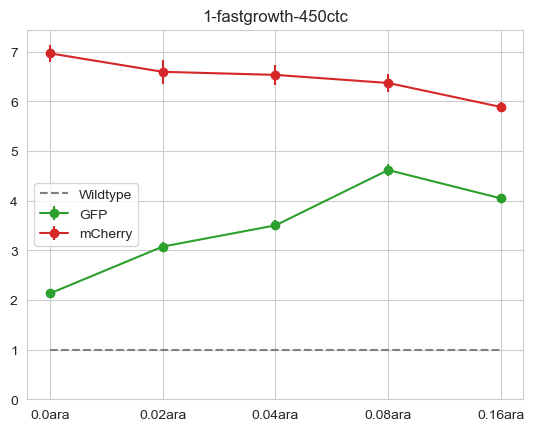

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
df = pd.DataFrame({"out_folder": out_folders,
                   "Ignore": ignore,
                   "mini cells": mini_cells,
                   "Growth Media": [media] * len(gfps),
                   "Strain": [strain] * (len(gfps) - 1) + ["SJ1695"],
                   "mini cells": mini_cells,
                   "GFP": np.round(gfps), 
                   "mCherry": np.round(mchrys), 
                   "cTc (ng/uL)": ctc_nguL, 
                   "ara (% w/v)": ara_wv,
                   "length": np.array(lengths) * pixel_size,
                   "radii": np.array(radii) * pixel_size,
                   "GFP STD": gfp_stds,
                   "mChry STD": mchry_stds,
                   "sample size": num_cells,
                   })
fig, ax = plt.subplots()
ax.errorbar(list(range(len(radii) - 1)), 
            df["GFP"][:-1] / df["GFP"][len(df["GFP"]) - 1], 
            yerr=gfp_stds[:-1] / gfps[-1] / np.array(num_cells[:-1])**0.5,
            label="GFP", marker='o', color='tab:green')
ax.errorbar(list(range(len(radii) - 1)), 
            df["mCherry"][:-1] / df["mCherry"][len(df["mCherry"]) - 1], 
            yerr=mchry_stds[:-1] / mchrys[-1] / np.array(num_cells[:-1])**0.5,
            label="mCherry", marker='o', color='tab:red')
ax.plot([0, len(df) - 2], [1, 1], 
        color='gray', 
        label='Wildtype', 
        linestyle='dashed')
ax.set_title(Path(".").resolve().name)
plt.xticks(np.arange(0, len(df["GFP"]) - 1, 1.0))
ax.set_xticklabels([folder[:-1] for folder in df["out_folder"]][:-1])
ax.set_ylim(bottom = 0)
ax.legend()
df.to_csv("basic-analysis.csv")
df
